In [2]:
!pip install mlrose

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mlrose
import time

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# 1. Four Peaks

In [5]:
### problem
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True)

In [6]:
### run algorithms
compare_dict = {}

max_iters = 1000

random_state = 1

# simulated_annealing
schedule = mlrose.ExpDecay()
# genetic_alg, mimic
ga_mimic_iters = 1000
# mimic
mimic_vectorize = True

# random_hill_climb
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                                   max_attempts = max_iters, max_iters = max_iters, 
                                                                   random_state = random_state, curve= True)
stop_time = time.time()
time_taken = stop_time - start_time
color = 'r-'
compare_dict['random_hill_climb'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

# simulated_annealing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                                    max_attempts = max_iters, max_iters = max_iters, 
                                                                    random_state = random_state, curve= True)
stop_time = time.time()
time_taken = stop_time - start_time
color='y-'
compare_dict['simulated_annealing'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

# genetic_alg
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = 200,
                                                             max_attempts = ga_mimic_iters, max_iters = ga_mimic_iters, 
                                                             random_state = random_state, curve= True)
stop_time = time.time()
time_taken = stop_time - start_time
color='b-'
compare_dict['genetic_alg'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

# mimic
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200,
                                                       max_attempts = ga_mimic_iters, max_iters = ga_mimic_iters, 
                                                       random_state = random_state, curve= True, 
                                                       fast_mimic = mimic_vectorize)
stop_time = time.time()
time_taken = stop_time - start_time
color='g-'
compare_dict['mimic'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

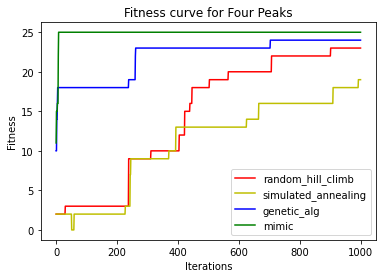

In [7]:
### plot
fig, ax = plt.subplots()
for ro_algo in compare_dict:
    ax.plot(range(0, len(compare_dict[ro_algo]['fitness_curve'])), compare_dict[ro_algo]['fitness_curve'], compare_dict[ro_algo]['color'], label=ro_algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curve for Four Peaks')
ax.legend()
plt.show(fig)

In [8]:
### helper function

def run_ro_algo(problem, max_iters=1000, ga_mimic_iters=1000, mimic_vectorize=True):

  compare_dict = {}

  #max_iters = 1000

  random_state = 1

  # simulated_annealing
  schedule = mlrose.ExpDecay()
  # genetic_alg, mimic
  #ga_mimic_iters = 1000
  # mimic
  #mimic_vectorize = True

  # random_hill_climb
  start_time = time.time()
  best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, 
                                                                   max_attempts = max_iters, max_iters = max_iters, 
                                                                   random_state = random_state, curve= True)
  stop_time = time.time()
  time_taken = stop_time - start_time
  color = 'r-'
  compare_dict['random_hill_climb'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

  # simulated_annealing
  start_time = time.time()
  best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                                    max_attempts = max_iters, max_iters = max_iters, 
                                                                    random_state = random_state, curve= True)
  stop_time = time.time()
  time_taken = stop_time - start_time
  color='y-'
  compare_dict['simulated_annealing'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

  # genetic_alg
  start_time = time.time()
  best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size = 200,
                                                             max_attempts = ga_mimic_iters, max_iters = ga_mimic_iters, 
                                                             random_state = random_state, curve= True)
  stop_time = time.time()
  time_taken = stop_time - start_time
  color='b-'
  compare_dict['genetic_alg'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}

  # mimic
  start_time = time.time()
  best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200,
                                                       max_attempts = ga_mimic_iters, max_iters = ga_mimic_iters, 
                                                       random_state = random_state, curve= True, 
                                                       fast_mimic = mimic_vectorize)
  stop_time = time.time()
  time_taken = stop_time - start_time
  color='g-'
  compare_dict['mimic'] = {'best_state':best_state, 'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}


  return compare_dict

In [9]:
### compare running time
max_iterations = 1000
step = 100

running_time = {}

for i in range(100, max_iterations+1, step):
    result = run_ro_algo(problem, max_iters=i, ga_mimic_iters=i)
    for ro_algo in result:
        if i == 100:
            running_time[ro_algo] = [result[ro_algo]['time_taken']]
        else:
            running_time[ro_algo].append(result[ro_algo]['time_taken'])

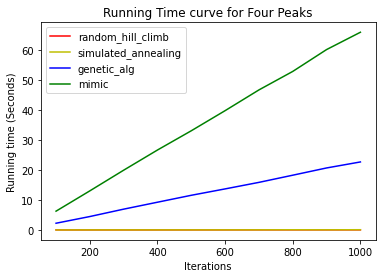

In [12]:
### plot running time
colors = {'random_hill_climb':'r-', 'simulated_annealing':'y-', 'genetic_alg':'b-', 'mimic':'g-'}

fig, ax = plt.subplots()
for ro_algo in running_time:
    ax.plot(list(range(100, max_iterations+1, step)), running_time[ro_algo], colors[ro_algo], label=ro_algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Running time (Seconds)')
ax.set_title('Running Time curve for Four Peaks')
ax.legend()
plt.show(fig)

### parameters tuning:

In [6]:
keep_val = [ 0.1 , 0.2, 0.3]
keep_key = ['Mutation Prob: 0.1', 'Mutation Prob: 0.2', 'Mutation Prob: 0.3']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']
result_dict_ga = {'Mutation Prob: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }

ga_iterations = 1000
for index, val in enumerate(keep_key):
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, 
                                                                 mutation_prob=keep_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, 
                random_state = 1, curve= True)
    result_dict_ga[keep_key[index]]['best_state'] = best_state
    result_dict_ga[keep_key[index]]['best_fitness'] = best_fitness
    result_dict_ga[keep_key[index]]['fitness_curve'] = fitness_curve
    result_dict_ga[keep_key[index]]['color'] = schedule_color[index]

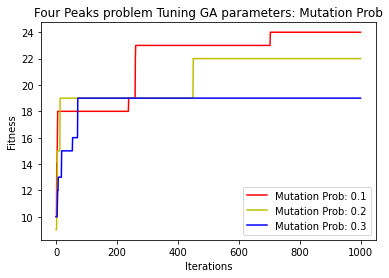

In [7]:
fig, ax = plt.subplots()
for key in keep_key:
    ax.plot(range(0,len(result_dict_ga[key]['fitness_curve'])), result_dict_ga[key]['fitness_curve'], result_dict_ga[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Four Peaks problem Tuning GA parameters: Mutation Prob')
ax.legend()
plt.show(fig)

In [8]:
schedules = [mlrose.ExpDecay(init_temp=1), mlrose.ExpDecay(init_temp=10), mlrose.ExpDecay(init_temp=100)]
schedule_key = ['Initial temperature = 1', 'Initial temperature = 10', 'Initial temperature = 100']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']

result_dict_sa = {}
sa_iterations = 1000
for index, val in enumerate(schedules):
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule = val,
max_attempts = sa_iterations, max_iters = sa_iterations, random_state = 1, curve= True)
    result_dict_sa[schedule_key[index]] = {'best_state':'', 'best_fitness':'', 'fitness_curve':''}
    result_dict_sa[schedule_key[index]]['best_state'] = best_state
    result_dict_sa[schedule_key[index]]['best_fitness'] = best_fitness
    result_dict_sa[schedule_key[index]]['fitness_curve'] = fitness_curve
    
    result_dict_sa[schedule_key[index]]['color'] = schedule_color[index]

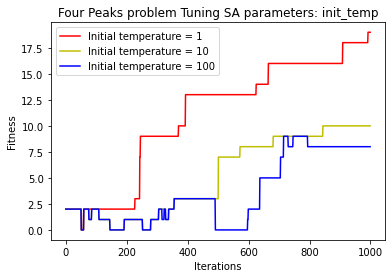

In [9]:
fig, ax = plt.subplots()
for key in schedule_key:
    ax.plot(range(0,len(result_dict_sa[key]['fitness_curve'])), result_dict_sa[key]['fitness_curve'], result_dict_sa[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Four Peaks problem Tuning SA parameters: init_temp')
ax.legend()
plt.show(fig)

In [10]:
keep_val = [0.1 , 0.2, 0.3]
keep_key = [ 'Sample to keep: 0.1', 'Sample to keep: 0.2', 'Sample to keep: 0.3']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']
result_dict_mimic = {'Sample to keep: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }

ga_iterations = 1000
for index, val in enumerate(keep_key):
    print(val)
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=keep_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True, fast_mimic=True)
    result_dict_mimic[keep_key[index]]['best_state'] = best_state
    result_dict_mimic[keep_key[index]]['best_fitness'] = best_fitness
    result_dict_mimic[keep_key[index]]['fitness_curve'] = fitness_curve
    result_dict_mimic[keep_key[index]]['color'] = schedule_color[index]

Sample to keep: 0.1
Sample to keep: 0.2
Sample to keep: 0.3


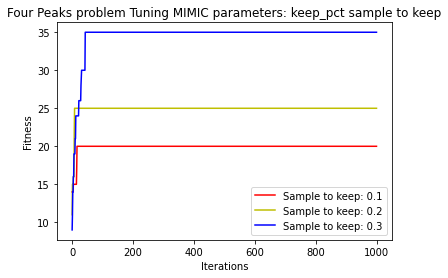

In [11]:
fig, ax = plt.subplots()
for key in keep_key:
    ax.plot(range(0,len(result_dict_mimic[key]['fitness_curve'])), result_dict_mimic[key]['fitness_curve'], result_dict_mimic[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Four Peaks problem Tuning MIMIC parameters: keep_pct sample to keep')
ax.legend()
plt.show(fig)

# 2. Traveling Salesman

In [12]:
### problem
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

city_coordinate = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coordinate.append(city_coor)

fitness_tsp = mlrose.TravellingSales(distances = city_coordinate)
problem_tsp = mlrose.TSPOpt(length = 13, fitness_fn = fitness_tsp, maximize=False)

In [15]:
### run algorithms
result_tsp = run_ro_algo(problem_tsp, max_iters=200, ga_mimic_iters=200, mimic_vectorize=False)

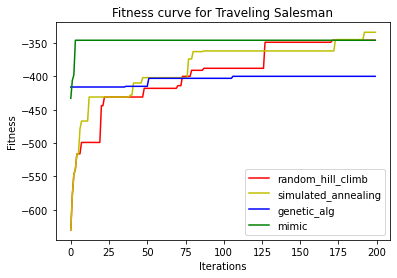

In [16]:
### plot fitness curve for tsp
fig, ax = plt.subplots()
for ro_algo in result_tsp:
    ax.plot(range(0,len(result_tsp[ro_algo]['fitness_curve'])), result_tsp[ro_algo]['fitness_curve'], result_tsp[ro_algo]['color'], label=ro_algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curve for Traveling Salesman')
ax.legend()
plt.show(fig)

In [17]:
### compare running time
max_iterations = 1000
step = 100

running_time_tsp = {}

for i in range(100, max_iterations+1, step):
    result = run_ro_algo(problem_tsp, max_iters=i, ga_mimic_iters=i, mimic_vectorize=False)
    for ro_algo in result:
        if i == 100:
            running_time_tsp[ro_algo] = [result[ro_algo]['time_taken']]
        else:
            running_time_tsp[ro_algo].append(result[ro_algo]['time_taken'])

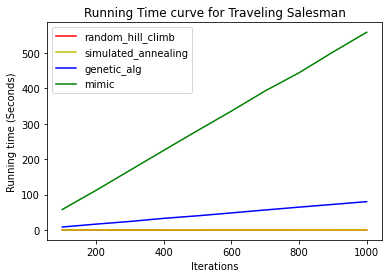

In [18]:
### plot running time curve
colors = {'random_hill_climb':'r-', 'simulated_annealing':'y-', 'genetic_alg':'b-', 'mimic':'g-'}

fig, ax = plt.subplots()
for ro_algo in running_time_tsp:
    ax.plot(list(range(100, max_iterations+1, step)), running_time_tsp[ro_algo], colors[ro_algo], label=ro_algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Running time (Seconds)')
ax.set_title('Running Time curve for Traveling Salesman')
ax.legend()
plt.show(fig)

### tune parameters:

In [13]:
keep_val = [ 0.1 , 0.2, 0.3]
keep_key = ['Mutation Prob: 0.1', 'Mutation Prob: 0.2', 'Mutation Prob: 0.3']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']
result_dict_ga = {'Mutation Prob: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }

ga_iterations = 1000
for index, val in enumerate(keep_key):
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_tsp, pop_size=200, mutation_prob=keep_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True)
    result_dict_ga[keep_key[index]]['best_state'] = best_state
    result_dict_ga[keep_key[index]]['best_fitness'] = best_fitness
    result_dict_ga[keep_key[index]]['fitness_curve'] = fitness_curve
    result_dict_ga[keep_key[index]]['color'] = schedule_color[index]

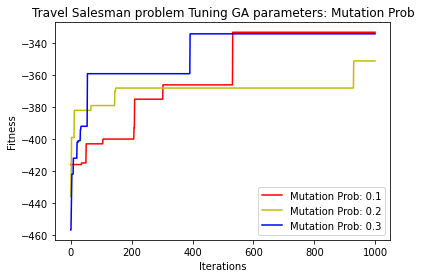

In [16]:
fig, ax = plt.subplots()
for key in keep_key:
    ax.plot(range(0,len(result_dict_ga[key]['fitness_curve'])), result_dict_ga[key]['fitness_curve'], result_dict_ga[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Travel Salesman problem Tuning GA parameters: Mutation Prob')
ax.legend()
plt.show(fig)

In [15]:
schedules = [mlrose.ExpDecay(init_temp=1), mlrose.ExpDecay(init_temp=10), mlrose.ExpDecay(init_temp=100)]
schedule_key = ['Initial temperature = 1', 'Initial temperature = 10', 'Initial temperature = 100']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']

result_dict_sa = {}
sa_iterations = 1000
for index, val in enumerate(schedules):
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_tsp, schedule = val,
max_attempts = sa_iterations, max_iters = sa_iterations, random_state = 1, curve= True)
    result_dict_sa[schedule_key[index]] = {'best_state':'', 'best_fitness':'', 'fitness_curve':''}
    result_dict_sa[schedule_key[index]]['best_state'] = best_state
    result_dict_sa[schedule_key[index]]['best_fitness'] = best_fitness
    result_dict_sa[schedule_key[index]]['fitness_curve'] = fitness_curve
    
    result_dict_sa[schedule_key[index]]['color'] = schedule_color[index]

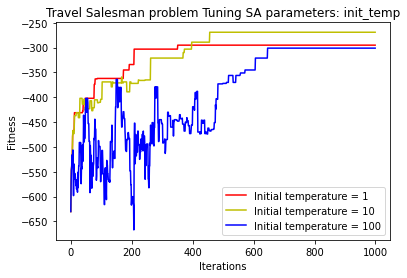

In [17]:
fig, ax = plt.subplots()
for key in schedule_key:
    ax.plot(range(0,len(result_dict_sa[key]['fitness_curve'])), result_dict_sa[key]['fitness_curve'], result_dict_sa[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Travel Salesman problem Tuning SA parameters: init_temp')
ax.legend()
plt.show(fig)

In [26]:
keep_val = [0.1 , 0.2, 0.3]
keep_key = [ 'Sample to keep: 0.1', 'Sample to keep: 0.2', 'Sample to keep: 0.3']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']
result_dict_mimic = {'Sample to keep: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }
                 
ga_iterations = 1000
for index, val in enumerate(keep_key):
    print(val)
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem_tsp, pop_size=200, keep_pct=keep_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True, fast_mimic=True)
    result_dict_mimic[keep_key[index]]['best_state'] = best_state
    result_dict_mimic[keep_key[index]]['best_fitness'] = best_fitness
    result_dict_mimic[keep_key[index]]['fitness_curve'] = fitness_curve
    result_dict_mimic[keep_key[index]]['color'] = schedule_color[index]

Sample to keep: 0.1
Sample to keep: 0.2


ValueError: ignored

# 3. N Queen

In [19]:
### problem
fitness_nq = mlrose.Queens()
problem_nq = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness_nq, maximize = False)

In [20]:
### run algorithms
result_nq = run_ro_algo(problem_nq, max_iters=1000, ga_mimic_iters=1000)

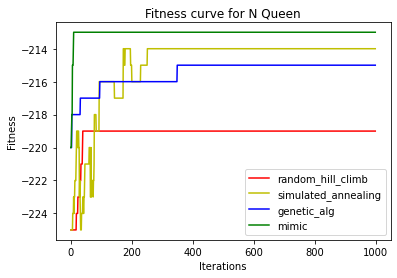

In [21]:
### plot fitness curve for n queen
fig, ax = plt.subplots()
for ro_algo in result_nq:
    ax.plot(range(0,len(result_nq[ro_algo]['fitness_curve'])), result_nq[ro_algo]['fitness_curve'], result_nq[ro_algo]['color'], label=ro_algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness curve for N Queen')
ax.legend()
plt.show(fig)

In [22]:
### compare running time
max_iterations = 1000
step = 100

running_time_nq = {}

for i in range(100, max_iterations+1, step):
    result = run_ro_algo(problem_nq, max_iters=i, ga_mimic_iters=i)
    for ro_algo in result:
        if i == 100:
            running_time_nq[ro_algo] = [result[ro_algo]['time_taken']]
        else:
            running_time_nq[ro_algo].append(result[ro_algo]['time_taken'])

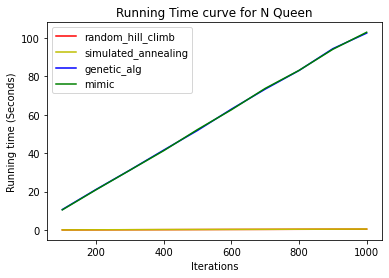

In [23]:
### plot running time curve
colors = {'random_hill_climb':'r-', 'simulated_annealing':'y-', 'genetic_alg':'b-', 'mimic':'g-'}

fig, ax = plt.subplots()
for ro_algo in running_time_nq:
    ax.plot(list(range(100, max_iterations+1, step)), running_time_nq[ro_algo], colors[ro_algo], label=ro_algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Running time (Seconds)')
ax.set_title('Running Time curve for N Queen')
ax.legend()
plt.show(fig)

### parameters tuning:

In [20]:
keep_val = [ 0.1 , 0.2, 0.3]
keep_key = ['Mutation Prob: 0.1', 'Mutation Prob: 0.2', 'Mutation Prob: 0.3']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']
result_dict_ga = {'Mutation Prob: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }

ga_iterations = 1000
for index, val in enumerate(keep_key):
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_nq, pop_size=200, mutation_prob=keep_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True)
    result_dict_ga[keep_key[index]]['best_state'] = best_state
    result_dict_ga[keep_key[index]]['best_fitness'] = best_fitness
    result_dict_ga[keep_key[index]]['fitness_curve'] = fitness_curve
    result_dict_ga[keep_key[index]]['color'] = schedule_color[index]

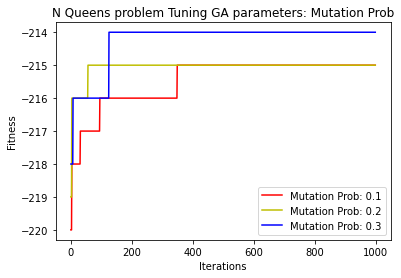

In [21]:
fig, ax = plt.subplots()
for key in keep_key:
    ax.plot(range(0,len(result_dict_ga[key]['fitness_curve'])), result_dict_ga[key]['fitness_curve'], result_dict_ga[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('N Queens problem Tuning GA parameters: Mutation Prob')
ax.legend()
plt.show(fig)

In [22]:
schedules = [mlrose.ExpDecay(init_temp=1), mlrose.ExpDecay(init_temp=10), mlrose.ExpDecay(init_temp=100)]
schedule_key = ['Initial temperature = 1', 'Initial temperature = 10', 'Initial temperature = 100']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']

result_dict_sa = {}
sa_iterations = 1000
for index, val in enumerate(schedules):
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_nq, schedule = val,
max_attempts = sa_iterations, max_iters = sa_iterations, random_state = 1, curve= True)
    result_dict_sa[schedule_key[index]] = {'best_state':'', 'best_fitness':'', 'fitness_curve':''}
    result_dict_sa[schedule_key[index]]['best_state'] = best_state
    result_dict_sa[schedule_key[index]]['best_fitness'] = best_fitness
    result_dict_sa[schedule_key[index]]['fitness_curve'] = fitness_curve
    
    result_dict_sa[schedule_key[index]]['color'] = schedule_color[index]

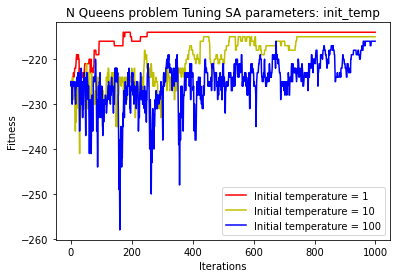

In [23]:
fig, ax = plt.subplots()
for key in schedule_key:
    ax.plot(range(0,len(result_dict_sa[key]['fitness_curve'])), result_dict_sa[key]['fitness_curve'], result_dict_sa[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('N Queens problem Tuning SA parameters: init_temp')
ax.legend()
plt.show(fig)

In [24]:
keep_val = [0.1 , 0.2, 0.3]
keep_key = [ 'Sample to keep: 0.1', 'Sample to keep: 0.2', 'Sample to keep: 0.3']
schedule_color = ['r-', 'y-', 'b-', 'C1', 'C5']
result_dict_mimic = {'Sample to keep: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }
                 
ga_iterations = 1000
for index, val in enumerate(keep_key):
    print(val)
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem_nq, pop_size=200, keep_pct=keep_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True, fast_mimic=True)
    result_dict_mimic[keep_key[index]]['best_state'] = best_state
    result_dict_mimic[keep_key[index]]['best_fitness'] = best_fitness
    result_dict_mimic[keep_key[index]]['fitness_curve'] = fitness_curve
    result_dict_mimic[keep_key[index]]['color'] = schedule_color[index]

Sample to keep: 0.1
Sample to keep: 0.2
Sample to keep: 0.3


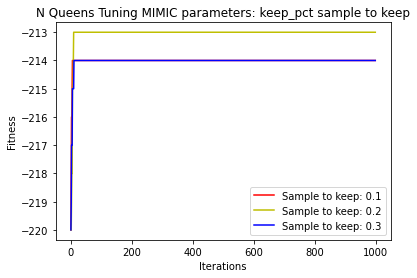

In [25]:
fig, ax = plt.subplots()
for key in keep_key:
    ax.plot(range(0,len(result_dict_mimic[key]['fitness_curve'])), result_dict_mimic[key]['fitness_curve'], result_dict_mimic[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('N Queens Tuning MIMIC parameters: keep_pct sample to keep')
ax.legend()
plt.show(fig)

# Neural Networks

In [2]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.neural_network import MLPClassifier

In [4]:
df = pd.read_csv('/content/winequality-white-balanced.csv', sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3284 non-null   float64
 1   volatile acidity      3284 non-null   float64
 2   citric acid           3284 non-null   float64
 3   residual sugar        3284 non-null   float64
 4   chlorides             3284 non-null   float64
 5   free sulfur dioxide   3284 non-null   float64
 6   total sulfur dioxide  3284 non-null   float64
 7   density               3284 non-null   float64
 8   pH                    3284 non-null   float64
 9   sulphates             3284 non-null   float64
 10  alcohol               3284 non-null   float64
 11  quality               3284 non-null   int64  
 12  class                 3284 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 333.7 KB


In [6]:
random_state = 1
df['labels'] = df['class']
df_numerical = df.drop(['quality', 'class', 'labels'], axis=1)
scaling = StandardScaler()
df_numerical_scaled = scaling.fit_transform(df_numerical)
features = df_numerical_scaled
labels = df['labels']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=random_state)  # 0.33 0.2
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

## Run three RO algorithms

In [9]:
### run algorithms
iterations = 1000

hidden_nodes = [8, 16]
activation = 'sigmoid'

compare_dict_nn = {
              'random_hill_climb':{'loss':[], 'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'simulated_annealing': {'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'genetic_alg':{'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}
             }

In [10]:
# random_hill
nn_rhc = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

start_time = time.time()
nn_rhc.fit(X_train, y_train)
stop_time = time.time()
time_taken = stop_time - start_time
y_pred = nn_rhc.predict(X_test)

compare_dict_nn['random_hill_climb']['loss'].append(nn_rhc.loss)
compare_dict_nn['random_hill_climb']['test_score'].append(accuracy_score(y_test, y_pred))
compare_dict_nn['random_hill_climb']['train_score'].append(nn_rhc.score(X_train, y_train))
compare_dict_nn['random_hill_climb']['fit_times'].append(time_taken)
compare_dict_nn['random_hill_climb']['fit_curve'].append(nn_rhc.fitness_curve )
compare_dict_nn['random_hill_climb']['model']= nn_rhc

print('Training random_hill_climb 1000 iterations:','loss', nn_rhc.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_rhc.score(X_train, y_train), 'time_taken', time_taken)

Training random_hill_climb 1000 iterations: loss 0.9389581700340774 test 0.496309963099631 train_score 0.5027272727272727 time_taken 6.897475481033325


In [11]:
# simulated_annealing
schedule = mlrose.ExpDecay()
nn_sa = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'simulated_annealing', schedule=schedule, max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

start_time = time.time()
nn_sa.fit(X_train, y_train)
stop_time = time.time()
time_taken = stop_time - start_time
y_pred = nn_sa.predict(X_test)

compare_dict_nn['simulated_annealing']['loss'].append(nn_sa.loss)
compare_dict_nn['simulated_annealing']['test_score'].append(accuracy_score(y_test, y_pred))
compare_dict_nn['simulated_annealing']['train_score'].append(nn_sa.score(X_train, y_train))
compare_dict_nn['simulated_annealing']['fit_times'].append(time_taken)
compare_dict_nn['simulated_annealing']['fit_curve'].append(nn_sa.fitness_curve )
compare_dict_nn['simulated_annealing']['model']= nn_sa

print('Training simulated_annealing 1000 iterations:','loss', nn_sa.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_sa.score(X_train, y_train), 'time_taken', time_taken)

Training simulated_annealing 1000 iterations: loss 0.946701390728676 test 0.496309963099631 train_score 0.5027272727272727 time_taken 9.34513545036316


In [12]:
# genetic_alg
nn_ga = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'genetic_alg', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5, \
                             random_state = random_state, curve=True)

start_time = time.time()
nn_ga.fit(X_train, y_train)
stop_time = time.time()
time_taken = stop_time - start_time
y_pred = nn_ga.predict(X_test)

compare_dict_nn['genetic_alg']['loss'].append(nn_ga.loss)
compare_dict_nn['genetic_alg']['test_score'].append(accuracy_score(y_test, y_pred))
compare_dict_nn['genetic_alg']['train_score'].append(nn_ga.score(X_train, y_train))
compare_dict_nn['genetic_alg']['fit_times'].append(time_taken)
compare_dict_nn['genetic_alg']['fit_curve'].append(nn_ga.fitness_curve )
compare_dict_nn['genetic_alg']['model']= nn_ga

print('Training genetic_alg 1000 iterations:','loss', nn_ga.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_ga.score(X_train, y_train), 'time_taken', time_taken)

Training genetic_alg 1000 iterations: loss 0.8254507833812781 test 0.5276752767527675 train_score 0.5363636363636364 time_taken 964.2048466205597


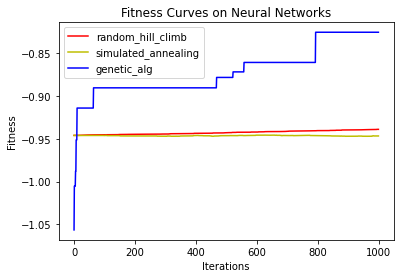

In [13]:
### plot fitness curve compare
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']
algo_color = ['r-', 'y-', 'b-']

fig, ax = plt.subplots()
for index, algo in enumerate(algorithms):
    ax.plot(range(0,len(compare_dict_nn[algo]['fit_curve'][0])) , compare_dict_nn[algo]['fit_curve'][0], algo_color[index], label=algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness Curves on Neural Networks')
ax.legend()
plt.show(fig)

In [17]:
print('Time taken for random_hill_climb is: ', compare_dict_nn['random_hill_climb']['fit_times'])
print('Time taken for simulated_annealing is: ', compare_dict_nn['simulated_annealing']['fit_times'])
print('Time taken for genetic_alg is: ', compare_dict_nn['genetic_alg']['fit_times'])

Time taken for random_hill_climb is:  [6.897475481033325]
Time taken for simulated_annealing is:  [9.34513545036316]
Time taken for genetic_alg is:  [964.2048466205597]


In [19]:
print('Test score for random_hill_climb is: ', compare_dict_nn['random_hill_climb']['test_score'])
print('Test score for simulated_annealing is: ', compare_dict_nn['simulated_annealing']['test_score'])
print('Test score for genetic_alg is: ', compare_dict_nn['genetic_alg']['test_score'])

Test score for random_hill_climb is:  [0.496309963099631]
Test score for simulated_annealing is:  [0.496309963099631]
Test score for genetic_alg is:  [0.5276752767527675]


In [20]:
print('Train score for random_hill_climb is: ', compare_dict_nn['random_hill_climb']['train_score'])
print('Train score for simulated_annealing is: ', compare_dict_nn['simulated_annealing']['train_score'])
print('Train score for genetic_alg is: ', compare_dict_nn['genetic_alg']['train_score'])

Train score for random_hill_climb is:  [0.5027272727272727]
Train score for simulated_annealing is:  [0.5027272727272727]
Train score for genetic_alg is:  [0.5363636363636364]


In [22]:
print('Loss for random_hill_climb is: ', compare_dict_nn['random_hill_climb']['loss'])
print('Loss for simulated_annealing is: ', compare_dict_nn['simulated_annealing']['loss'])
print('Loss for genetic_alg is: ', compare_dict_nn['genetic_alg']['loss'])

Loss for random_hill_climb is:  [0.9389581700340774]
Loss for simulated_annealing is:  [0.946701390728676]
Loss for genetic_alg is:  [0.8254507833812781]


In [24]:
nn_clf = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

start_time = time.time()
nn_clf.fit(X_train, y_train)
stop_time = time.time()
pred_nn = nn_clf.predict(X_test)

print('Time taken for gradient descent is: ', stop_time - start_time)
print("Train Score for gradient descent is:", nn_clf.score(X_train, y_train))
print("Test Score for gradient descent is:", accuracy_score(y_test, pred_nn))

Time taken for gradient descent is:  0.6781363487243652
Train Score for gradient descent is: 0.7109090909090909
Test Score for gradient descent is: 0.7011070110701108


#### hidden nodes = [16, 8]:

In [25]:
### run algorithms
iterations = 1000

hidden_nodes = [16, 8]
activation = 'sigmoid'

compare_dict_nn2 = {
              'random_hill_climb':{'loss':[], 'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'simulated_annealing': {'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'genetic_alg':{'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}
             }

In [26]:
# random_hill
nn_rhc = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

start_time = time.time()
nn_rhc.fit(X_train, y_train)
stop_time = time.time()
time_taken = stop_time - start_time
y_pred = nn_rhc.predict(X_test)

compare_dict_nn2['random_hill_climb']['loss'].append(nn_rhc.loss)
compare_dict_nn2['random_hill_climb']['test_score'].append(accuracy_score(y_test, y_pred))
compare_dict_nn2['random_hill_climb']['train_score'].append(nn_rhc.score(X_train, y_train))
compare_dict_nn2['random_hill_climb']['fit_times'].append(time_taken)
compare_dict_nn2['random_hill_climb']['fit_curve'].append(nn_rhc.fitness_curve )
compare_dict_nn2['random_hill_climb']['model']= nn_rhc

print('Training random_hill_climb 1000 iterations:','loss', nn_rhc.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_rhc.score(X_train, y_train), 'time_taken', time_taken)

Training random_hill_climb 1000 iterations: loss 0.7826536138795632 test 0.503690036900369 train_score 0.49727272727272726 time_taken 6.870621204376221


In [27]:
# simulated_annealing
schedule = mlrose.ExpDecay()
nn_sa = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'simulated_annealing', schedule=schedule, max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

start_time = time.time()
nn_sa.fit(X_train, y_train)
stop_time = time.time()
time_taken = stop_time - start_time
y_pred = nn_sa.predict(X_test)

compare_dict_nn2['simulated_annealing']['loss'].append(nn_sa.loss)
compare_dict_nn2['simulated_annealing']['test_score'].append(accuracy_score(y_test, y_pred))
compare_dict_nn2['simulated_annealing']['train_score'].append(nn_sa.score(X_train, y_train))
compare_dict_nn2['simulated_annealing']['fit_times'].append(time_taken)
compare_dict_nn2['simulated_annealing']['fit_curve'].append(nn_sa.fitness_curve )
compare_dict_nn2['simulated_annealing']['model']= nn_sa

print('Training simulated_annealing 1000 iterations:','loss', nn_sa.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_sa.score(X_train, y_train), 'time_taken', time_taken)

Training simulated_annealing 1000 iterations: loss 0.7852722794448828 test 0.503690036900369 train_score 0.49727272727272726 time_taken 9.454657793045044


In [28]:
# genetic_alg
nn_ga = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'genetic_alg', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5, \
                             random_state = random_state, curve=True)

start_time = time.time()
nn_ga.fit(X_train, y_train)
stop_time = time.time()
time_taken = stop_time - start_time
y_pred = nn_ga.predict(X_test)

compare_dict_nn2['genetic_alg']['loss'].append(nn_ga.loss)
compare_dict_nn2['genetic_alg']['test_score'].append(accuracy_score(y_test, y_pred))
compare_dict_nn2['genetic_alg']['train_score'].append(nn_ga.score(X_train, y_train))
compare_dict_nn2['genetic_alg']['fit_times'].append(time_taken)
compare_dict_nn2['genetic_alg']['fit_curve'].append(nn_ga.fitness_curve )
compare_dict_nn2['genetic_alg']['model']= nn_ga

print('Training genetic_alg 1000 iterations:','loss', nn_ga.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_ga.score(X_train, y_train), 'time_taken', time_taken)

Training genetic_alg 1000 iterations: loss 0.7359332320657704 test 0.5064575645756457 train_score 0.5027272727272727 time_taken 990.7586364746094


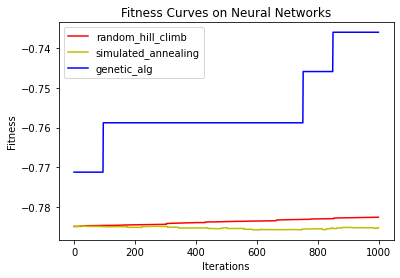

In [29]:
### plot fitness curve compare
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']
algo_color = ['r-', 'y-', 'b-']

fig, ax = plt.subplots()
for index, algo in enumerate(algorithms):
    ax.plot(range(0,len(compare_dict_nn2[algo]['fit_curve'][0])) , compare_dict_nn2[algo]['fit_curve'][0], algo_color[index], label=algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness Curves on Neural Networks')
ax.legend()
plt.show(fig)

In [30]:
print('Time taken for random_hill_climb is: ', compare_dict_nn2['random_hill_climb']['fit_times'])
print('Time taken for simulated_annealing is: ', compare_dict_nn2['simulated_annealing']['fit_times'])
print('Time taken for genetic_alg is: ', compare_dict_nn2['genetic_alg']['fit_times'])

print('Test score for random_hill_climb is: ', compare_dict_nn2['random_hill_climb']['test_score'])
print('Test score for simulated_annealing is: ', compare_dict_nn2['simulated_annealing']['test_score'])
print('Test score for genetic_alg is: ', compare_dict_nn2['genetic_alg']['test_score'])

print('Train score for random_hill_climb is: ', compare_dict_nn2['random_hill_climb']['train_score'])
print('Train score for simulated_annealing is: ', compare_dict_nn2['simulated_annealing']['train_score'])
print('Train score for genetic_alg is: ', compare_dict_nn2['genetic_alg']['train_score'])

print('Loss for random_hill_climb is: ', compare_dict_nn2['random_hill_climb']['loss'])
print('Loss for simulated_annealing is: ', compare_dict_nn2['simulated_annealing']['loss'])
print('Loss for genetic_alg is: ', compare_dict_nn2['genetic_alg']['loss'])

Time taken for random_hill_climb is:  [6.870621204376221]
Time taken for simulated_annealing is:  [9.454657793045044]
Time taken for genetic_alg is:  [990.7586364746094]
Test score for random_hill_climb is:  [0.503690036900369]
Test score for simulated_annealing is:  [0.503690036900369]
Test score for genetic_alg is:  [0.5064575645756457]
Train score for random_hill_climb is:  [0.49727272727272726]
Train score for simulated_annealing is:  [0.49727272727272726]
Train score for genetic_alg is:  [0.5027272727272727]
Loss for random_hill_climb is:  [0.7826536138795632]
Loss for simulated_annealing is:  [0.7852722794448828]
Loss for genetic_alg is:  [0.7359332320657704]
